# WeatherPy
----



3 Observations from the data:
1) Data indicates there are strong negative correlation amongst Latitude increases and Maximum Temperature increases in the Northern Hemisphere; whereas there is a strong positive correlation amongst Latutude increases and Maximum Temperatures in the Southern Hemisphere.
2) Latitude versus Maximum Temperature plot shows a parabola shaped plot indicating that as we closer to the equatore where the Latitude is zero that is where we will find the higher temperatures; whereas where the latitude is further away from zero there is decrease in maximum temperatures.  This is common knowledge as where the latitude seems to be futherest away from the equator, those regions are known as the North and South poles.
3) In the second part of this assignment we were asked to find the "ideal" vacation hotspots.  Where the temperature is between 70 and 80 degrees, the wind speed is less than 10 mph, and the cloudiness is rated at a zero.  Out of the random 641 cities my research was based upon, I found only 9 cities to have those factors.  "Ideal" weather is not as easy to come by so the data proves.  

*I have included analysis on the correlation coefficients from performing linear regressions abover each scatterplot in the sections below. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url  and unit variables

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empyt lists

city_name = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
temp = []
windspeed = []

# loop through cities and perform request for data
cities = cities #delete this line after done debugging
i = 1
for city in cities:
    city = city
    
    response = requests.get(query_url + city).json()
   
    
    try:
        
        city_name.append(response["name"])
        city_id.append(response["id"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"]) 
        i+=1
        #print(f"City: {city}, City ID: {response["id"]}")
        #print(response["id"])
        id = response["id"]
        print(f"City: {city}, City ID: {id}")
    
        
    except (KeyError):
        print("City not found...")


City: jamestown, City ID: 5122534
City: ribeira grande, City ID: 3372707
City not found...
City: kaitangata, City ID: 2208248
City: rocha, City ID: 3440777
City: mataura, City ID: 6201424
City: punta arenas, City ID: 3874787
City: port alfred, City ID: 964432
City: kurumkan, City ID: 2021188
City: bassila, City ID: 2395261
City: ostrovnoy, City ID: 556268
City: la asuncion, City ID: 3480908
City: izhmorskiy, City ID: 1505228
City not found...
City: bluff, City ID: 2206939
City: warrington, City ID: 2634739
City: lagoa, City ID: 3372964
City not found...
City: elat, City ID: 295277
City: goderich, City ID: 5962442
City: marion, City ID: 4260977
City: dikson, City ID: 1507390
City: rawson, City ID: 3839307
City not found...
City: komsomolskiy, City ID: 1513491
City: kopervik, City ID: 3149512
City: cidreira, City ID: 3466165
City not found...
City not found...
City: yellowknife, City ID: 6185377
City: bambous virieux, City ID: 1106677
City: alice springs, City ID: 2077895
City: rikitea, 

City: dharchula, City ID: 1272864
City: beira, City ID: 1052373
City: labuhan, City ID: 8079926
City: graciano sanchez, City ID: 3527413
City: colwyn bay, City ID: 2652513
City: nicoya, City ID: 3622716
City: buchanan, City ID: 2278158
City not found...
City not found...
City: richards bay, City ID: 962367
City not found...
City: rognan, City ID: 3141548
City: dingle, City ID: 1714733
City: grand forks, City ID: 5059430
City: lumut, City ID: 1735450
City: parana, City ID: 3841956
City: sorong, City ID: 1626542
City: clonakilty, City ID: 2965402
City not found...
City not found...
City: luanda, City ID: 2240449
City: lorengau, City ID: 2092164
City: geraldton, City ID: 2070998
City: manbij, City ID: 167357
City: behbahan, City ID: 140951
City not found...
City: sunndalsora, City ID: 3135377
City: port hedland, City ID: 2063042
City: palora, City ID: 3653523
City not found...
City not found...
City not found...
City: kloulklubed, City ID: 7671223
City: peno, City ID: 511592
City: kamenka

City: la ronge, City ID: 6050066
City: vestmannaeyjar, City ID: 3412093
City: skelleftea, City ID: 602913
City: mumford, City ID: 2297810
City: lamar, City ID: 4705086
City: pentecoste, City ID: 3392345
City: muroto, City ID: 1856392
City: taoudenni, City ID: 2450173
City: pinega, City ID: 509483
City: santona, City ID: 3109527
City: kampot, City ID: 1831112
City: camiri, City ID: 3922414
City: berlevag, City ID: 780687
City not found...
City not found...
City not found...
City: bathsheba, City ID: 3374083
City: ayotzintepec, City ID: 3532510
City: san quintin, City ID: 3984997
City: erenhot, City ID: 2037485
City: aguimes, City ID: 2522325
City: saint-augustin, City ID: 6137462
City: tabligbo, City ID: 2364041
City not found...
City: toucheng, City ID: 1674199
City: prachuap khiri khan, City ID: 1151073
City: puerto el triunfo, City ID: 3584003
City: auki, City ID: 2109701
City: oshawa, City ID: 6094578
City: karasjok, City ID: 779350
City: abriaqui, City ID: 3690582
City: sobradinho,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe of data

weather_df = pd.DataFrame({"City": city_name,
                           "City ID": city_id,
                           "Cloudiness": cloudiness,
                           "Country": country,
                           "Date": date, 
                           "Humidity": humidity, 
                           "Lat": lats, 
                           "Lng": lngs, 
                           "Max Temp": temp, 
                           "Wind Speed": windspeed})

# Export data into .csv

weather_df.to_csv("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files.csv")

# Display dataframe
weather_df.head(5)



,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,5122534,0,US,1659498466,71,42.0970,-79.2353,64.04,1.99
1,Ribeira Grande,3372707,85,PT,1659498689,87,38.5167,-28.7000,74.80,14.88
2,Kaitangata,2208248,28,NZ,1659498689,71,-46.2817,169.8464,50.77,12.10
3,Rocha,3440777,85,UY,1659498181,93,-34.4833,-54.3333,54.03,3.31
4,Mataura,6201424,68,NZ,1659498690,80,-46.1927,168.8643,44.47,7.38


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_df["Humidity_100"] = weather_df["Humidity"].apply(lambda x : 1 if x > 100 else 0)


In [6]:
# iterate through results for each city in cities if humidity > 100%

filter_criteria = weather_df["Humidity_100"] > 100
fc_df = weather_df[filter_criteria]

print(fc_df.shape)
fc_df

(0, 11)


,City,City ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Humidity_100


In [7]:
#  Get the indices of cities that have humidity over 100%.
#  No cities with humidty over 100%
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_humid_df = weather_df[weather_df["Humidity_100"] ==0]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

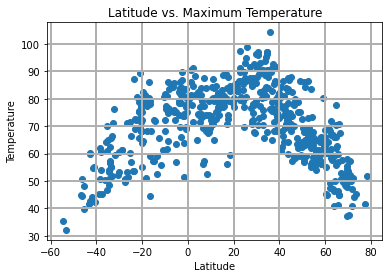

<Figure size 432x288 with 0 Axes>

In [8]:
# Create a Scatter Plot for latitude vs temp

x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Maximum Temperature")
plt.grid(linestyle='-', linewidth = 2)
plt.show()

plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/lat_temp.png")


## Latitude vs. Humidity Plot

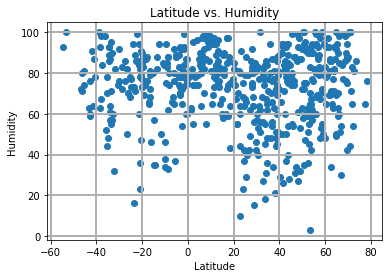

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a Scatter Plot for temperature vs latitude

x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs. Humidity")
plt.grid(linestyle='-', linewidth = 2)
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/lat_humidity.png")

## Latitude vs. Cloudiness Plot

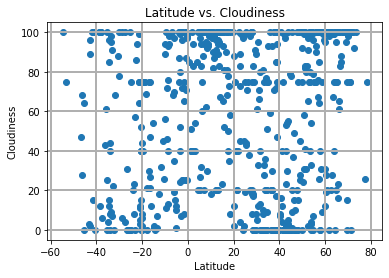

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a Scatter Plot for temperature vs cloudiness

x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
plt.grid(linestyle='-', linewidth = 2)
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

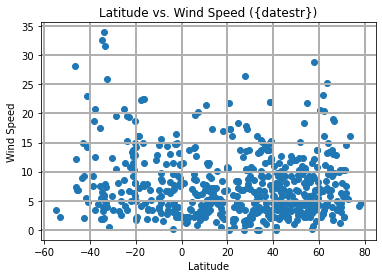

<Figure size 432x288 with 0 Axes>

In [11]:
# Create a Scatter Plot for temperature vs windspeed

x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed ({datestr})")
plt.grid(linestyle='-', linewidth = 2)
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/lat_windspeed.png")

## Linear Regression

In [12]:
# Create hemispheres

northern_df = weather_df.loc[weather_df["Lat"]>=0]
southern_df = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

According to Pearson's correlation coefficient guidelines we can gather that in the northern hwmisphere as we move closer to the north pole maximum we should except to see lower max temperatures. the rvalue is -.79 which is close to 
-1 and therefore the negative correlation is strong.

y = -0.42x +88.01
The r-value is: -0.640728442104479


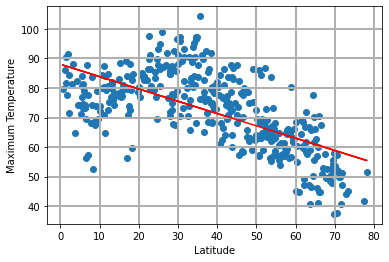

<Figure size 432x288 with 0 Axes>

In [13]:
# Perform a linear regression on temperature vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/maxtemp_lat_north.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In the southern hemisphere the data analysis shows a Pearson correlation coefficient of 0.87, indicating a 
strong positive reletionship between increases in latitude and maximum temperatures. 


y = 0.67x +80.24
The r-value is: 0.7151992707122604


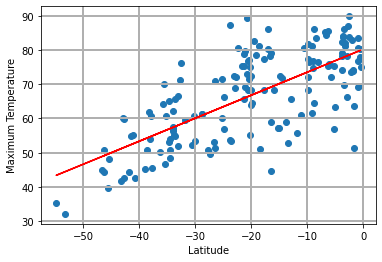

<Figure size 432x288 with 0 Axes>

In [14]:
# Perform a linear regression on temperature vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/maxtemp_lat_south")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

When analyzing humidity levels and latitude using data from the northern hemisphere we obtain an r-value of 0.095,
which is close to zero and therefore indicating there is a weak positive correlation between those variables. 
As we increase our latitude in the northern hemisphere the data shows it does not effect humidity levels.

y = -0.03x +74.44
The r-value is: -0.035943704923024004


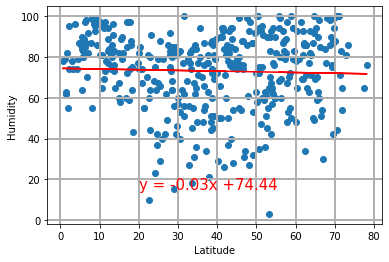

<Figure size 432x288 with 0 Axes>

In [15]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/humidity_lat_north.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

When analyzing humidity levels and latitude using data from the southern hemisphere we obtain an r-value of -0.18,
which is close to zero and therefore indicating there is a weak negative correlation between those variables. 
As we increase our latitude in the southern hemisphere the data shows it does not effect humidity levels.

y = -0.02x +74.12
The r-value is: -0.014739989655065592


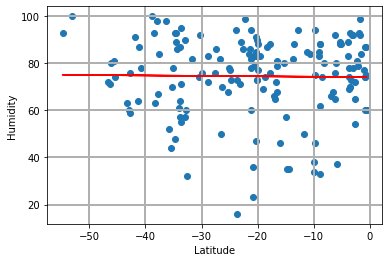

<Figure size 432x288 with 0 Axes>

In [16]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/humidity_lat_south.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value obtained for data from the northern hemisphere is very close to zero indicating there is no correlation 
with latitude increases and cloudiness.  The r-value was a mere .0002.

y = 0.01x +58.85
The r-value is: 0.005278122622604962


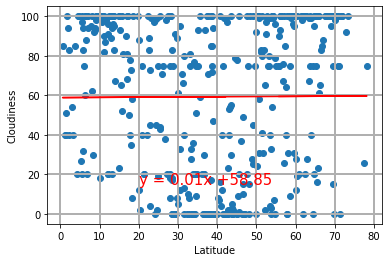

<Figure size 432x288 with 0 Axes>

In [17]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/cloudiness_lat_north.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value obtained for data from the southern hemisphere is close to zero indicating there is weak negative
correlation with latitude increases and cloudiness.  The r-value is -0.131.

y = 0.25x +54.3
The r-value is: 0.09198434677859359


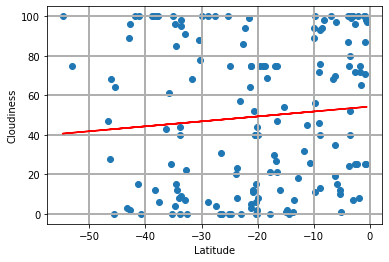

<Figure size 432x288 with 0 Axes>

In [18]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/cloudiness_lat_north.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

When analyzing wind speed and latitude using data from the northern hemisphere we obtain an r-value of 0.050,
which is close to zero and therefore indicating there is no correlation between those variables. 
As we increase our latitude in the northern hemisphere the data shows it does not effect wind speeds.

y = 0.02x +6.43
The r-value is: 0.08732287340653927


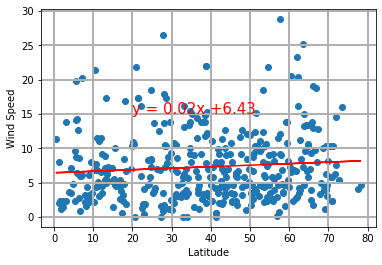

<Figure size 432x288 with 0 Axes>

In [19]:
# Perform a linear regression on humidity vs. latitude
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/windspeed_lat_north.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

When analyzing wind speed and latitude using data from the southern hemisphere we obtain an r-value of -0.098,
which is close to zero and therefore indicating there is a weak negative correlation between those variables. 
As we increase our latitude in the southern hemisphere the data shows it does not effect wind speeds.

y = -0.07x +7.59
The r-value is: -0.15723663695819837


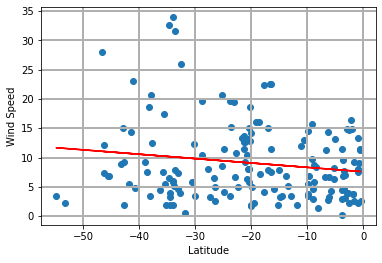

<Figure size 432x288 with 0 Axes>

In [20]:
# Perform a linear regression on humidity vs. latitude
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid(linestyle='-', linewidth = 2)

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()
plt.savefig("/Users/anishachaudhari/data_science/Challenges/API challenge/python-api-challenge/output_files/windspeed_lat_south.png")